In [13]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


In [5]:
data = pd.read_csv('unlabelled.csv')

In [6]:
data

,Unnamed: 0,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,Federal-gov,Local-gov,...,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,cluster
0,27,23,134446,9,1,0,0,54,0,0,...,0,1,0,0,0,0,0,0,0,0
1,48,52,201062,7,0,0,0,18,0,0,...,0,0,0,1,0,0,0,0,0,0
2,68,46,170338,9,1,0,0,40,0,0,...,0,0,0,0,0,0,0,0,1,0
3,73,21,388946,10,0,0,0,40,0,0,...,1,0,0,0,0,0,0,0,0,0
4,82,24,83141,10,1,0,1876,40,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30505,48824,45,119199,12,0,0,0,48,0,1,...,0,0,0,0,1,0,0,0,0,3
30506,48825,31,199655,14,0,0,0,30,0,0,...,0,0,1,0,0,0,0,0,0,3
30507,48827,37,198216,12,0,0,0,40,0,0,...,0,0,0,0,0,0,0,1,0,3
30508,48830,43,255835,10,0,0,0,40,0,0,...,0,0,0,0,0,0,0,0,0,3


In [7]:
data = data.drop(columns=['Unnamed: 0'])

In [8]:
data

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,Federal-gov,Local-gov,Private,...,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,cluster
0,23,134446,9,1,0,0,54,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,52,201062,7,0,0,0,18,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,46,170338,9,1,0,0,40,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,21,388946,10,0,0,0,40,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,24,83141,10,1,0,1876,40,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30505,45,119199,12,0,0,0,48,0,1,0,...,0,0,0,0,1,0,0,0,0,3
30506,31,199655,14,0,0,0,30,0,0,1,...,0,0,1,0,0,0,0,0,0,3
30507,37,198216,12,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,3
30508,43,255835,10,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [11]:
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

In [16]:
input_dim

42

In [23]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

input_dim = train_data.shape[1]  # Number of features in your data
encoding_dim = 32  # Number of nodes in the bottleneck layer

# Define the input layer
input_layer = Input(shape=(input_dim,))

# Define the encoding layers
encoder_layer1 = Dense(64, activation='relu')(input_layer)
encoder_layer2 = Dense(32, activation='relu')(encoder_layer1)
encoder_layer3 = Dense(encoding_dim, activation='relu')(encoder_layer2)

# Define the decoding layers with symmetric structure
decoder_layer1 = Dense(32, activation='relu')(encoder_layer3)
decoder_layer2 = Dense(64, activation='relu')(decoder_layer1)
decoder_layer3 = Dense(input_dim, activation='sigmoid')(decoder_layer2)

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder_layer3)


In [24]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
history = autoencoder.fit(train_data, train_data, epochs=300, batch_size=64, shuffle=True, validation_data=(val_data, val_data))


Epoch 1/300
382/382 [==============================] - 1s 1ms/step - loss: 1086412416.0000 - val_loss: 1104475008.0000
Epoch 2/300
382/382 [==============================] - 0s 1ms/step - loss: 1086411392.0000 - val_loss: 1104475008.0000
Epoch 3/300
382/382 [==============================] - 0s 1ms/step - loss: 1086412032.0000 - val_loss: 1104475008.0000
Epoch 4/300
382/382 [==============================] - 0s 1ms/step - loss: 1086411648.0000 - val_loss: 1104475008.0000
Epoch 5/300
382/382 [==============================] - 0s 1ms/step - loss: 1086411904.0000 - val_loss: 1104475008.0000
Epoch 6/300
382/382 [==============================] - 0s 1ms/step - loss: 1086411648.0000 - val_loss: 1104475008.0000
Epoch 7/300
382/382 [==============================] - 0s 1ms/step - loss: 1086412160.0000 - val_loss: 1104475008.0000
Epoch 8/300
382/382 [==============================] - 0s 1ms/step - loss: 1086411904.0000 - val_loss: 1104475008.0000
Epoch 9/300
382/382 [===========================

382/382 [==============================] - 0s 1ms/step - loss: 1086411904.0000 - val_loss: 1104475008.0000
Epoch 70/300
382/382 [==============================] - 0s 1ms/step - loss: 1086412160.0000 - val_loss: 1104475008.0000
Epoch 71/300
382/382 [==============================] - 0s 1ms/step - loss: 1086412160.0000 - val_loss: 1104475008.0000
Epoch 72/300
382/382 [==============================] - 0s 1ms/step - loss: 1086412416.0000 - val_loss: 1104475008.0000
Epoch 73/300
382/382 [==============================] - 0s 1ms/step - loss: 1086412160.0000 - val_loss: 1104475008.0000
Epoch 74/300
382/382 [==============================] - 0s 1ms/step - loss: 1086411904.0000 - val_loss: 1104475008.0000
Epoch 75/300
382/382 [==============================] - 0s 1ms/step - loss: 1086411776.0000 - val_loss: 1104475008.0000
Epoch 76/300
382/382 [==============================] - 0s 1ms/step - loss: 1086412416.0000 - val_loss: 1104475008.0000
Epoch 77/300
382/382 [==============================]

382/382 [==============================] - 0s 1ms/step - loss: 1086412032.0000 - val_loss: 1104475008.0000
Epoch 138/300
382/382 [==============================] - 0s 1ms/step - loss: 1086411392.0000 - val_loss: 1104475008.0000
Epoch 139/300
382/382 [==============================] - 0s 1ms/step - loss: 1086411392.0000 - val_loss: 1104475008.0000
Epoch 140/300
382/382 [==============================] - 0s 1ms/step - loss: 1086412416.0000 - val_loss: 1104475008.0000
Epoch 141/300
382/382 [==============================] - 0s 1ms/step - loss: 1086411392.0000 - val_loss: 1104475008.0000
Epoch 142/300
382/382 [==============================] - 0s 1ms/step - loss: 1086411520.0000 - val_loss: 1104475008.0000
Epoch 143/300
382/382 [==============================] - 0s 1ms/step - loss: 1086412288.0000 - val_loss: 1104475008.0000
Epoch 144/300
382/382 [==============================] - 0s 1ms/step - loss: 1086412544.0000 - val_loss: 1104475008.0000
Epoch 145/300
382/382 [=======================

Epoch 205/300
382/382 [==============================] - 0s 1ms/step - loss: 1086411776.0000 - val_loss: 1104475008.0000
Epoch 206/300
382/382 [==============================] - 0s 1ms/step - loss: 1086412160.0000 - val_loss: 1104475008.0000
Epoch 207/300
382/382 [==============================] - 0s 1ms/step - loss: 1086411648.0000 - val_loss: 1104475008.0000
Epoch 208/300
382/382 [==============================] - 0s 1ms/step - loss: 1086411520.0000 - val_loss: 1104475008.0000
Epoch 209/300
382/382 [==============================] - 0s 1ms/step - loss: 1086411904.0000 - val_loss: 1104475008.0000
Epoch 210/300
382/382 [==============================] - 0s 1ms/step - loss: 1086412416.0000 - val_loss: 1104475008.0000
Epoch 211/300
382/382 [==============================] - 0s 1ms/step - loss: 1086411904.0000 - val_loss: 1104475008.0000
Epoch 212/300
382/382 [==============================] - 0s 1ms/step - loss: 1086412160.0000 - val_loss: 1104475008.0000
Epoch 213/300
382/382 [=========

382/382 [==============================] - 0s 1ms/step - loss: 1086411904.0000 - val_loss: 1104475008.0000
Epoch 273/300
382/382 [==============================] - 0s 1ms/step - loss: 1086412032.0000 - val_loss: 1104475008.0000
Epoch 274/300
382/382 [==============================] - 0s 1ms/step - loss: 1086412032.0000 - val_loss: 1104475008.0000
Epoch 275/300
382/382 [==============================] - 0s 1ms/step - loss: 1086411648.0000 - val_loss: 1104475008.0000
Epoch 276/300
382/382 [==============================] - 0s 1ms/step - loss: 1086412160.0000 - val_loss: 1104475008.0000
Epoch 277/300
382/382 [==============================] - 0s 1ms/step - loss: 1086412032.0000 - val_loss: 1104475008.0000
Epoch 278/300
382/382 [==============================] - 0s 1ms/step - loss: 1086412160.0000 - val_loss: 1104475008.0000
Epoch 279/300
382/382 [==============================] - 0s 1ms/step - loss: 1086411904.0000 - val_loss: 1104475008.0000
Epoch 280/300
382/382 [=======================

191/191 [==============================] - 0s 611us/step
Mean Squared Error (MSE): 1104475175.737502
Standard Deviation (SD) of MSE: 1475660637.158283


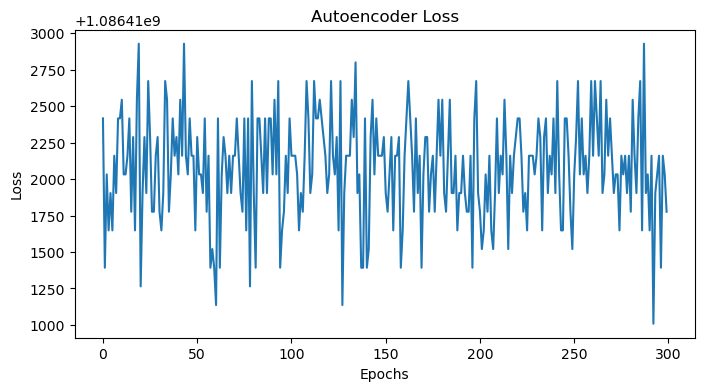

In [25]:
# Reconstruct the input data using the trained autoencoder
reconstructed_data = autoencoder.predict(val_data)

# Calculate the reconstruction loss
mse = np.mean(np.power(val_data - reconstructed_data, 2), axis=1)

# Print the mean and standard deviation of the reconstruction loss
print("Mean Squared Error (MSE):", np.mean(mse))
print("Standard Deviation (SD) of MSE:", np.std(mse))

# Plot the loss and accuracy graph
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'])
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [29]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_dim = train_data.shape[1]  # Number of features in your data
encoding_dim = 32  # Number of nodes in the bottleneck layer

# Define the input layer
input_layer = Input(shape=(input_dim,))

# Define the encoding layers
encoder_layer1 = Dense(128, activation='relu')(input_layer)
encoder_layer2 = Dense(64, activation='relu')(encoder_layer1)
encoder_layer3 = Dense(encoding_dim, activation='relu')(encoder_layer2)

# Define the decoding layers with symmetric structure
decoder_layer1 = Dense(64, activation='relu')(encoder_layer3)
decoder_layer2 = Dense(128, activation='relu')(decoder_layer1)
decoder_layer3 = Dense(input_dim, activation='sigmoid')(decoder_layer2)

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder_layer3)

# Compile the model
autoencoder.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

# Train the model with validation data
autoencoder.fit(train_data, train_data, epochs=50, batch_size=32, shuffle=True, validation_data=(val_data, val_data))


Epoch 1/50
763/763 [==============================] - 2s 1ms/step - loss: 1086411648.0000 - val_loss: 1104475392.0000
Epoch 2/50
763/763 [==============================] - 1s 1ms/step - loss: 1086411904.0000 - val_loss: 1104475392.0000
Epoch 3/50
763/763 [==============================] - 1s 1ms/step - loss: 1086413312.0000 - val_loss: 1104475392.0000
Epoch 4/50
763/763 [==============================] - 1s 1ms/step - loss: 1086411392.0000 - val_loss: 1104475392.0000
Epoch 5/50
763/763 [==============================] - 1s 1ms/step - loss: 1086411392.0000 - val_loss: 1104475392.0000
Epoch 6/50
763/763 [==============================] - 1s 1ms/step - loss: 1086412928.0000 - val_loss: 1104475392.0000
Epoch 7/50
763/763 [==============================] - 1s 1ms/step - loss: 1086412672.0000 - val_loss: 1104475392.0000
Epoch 8/50
763/763 [==============================] - 1s 1ms/step - loss: 1086412544.0000 - val_loss: 1104475392.0000
Epoch 9/50
763/763 [==============================] - 1s

191/191 [==============================] - 0s 625us/step
Mean Squared Error (MSE): 1104475108.7117143
Standard Deviation (SD) of MSE: 1475660621.1075962


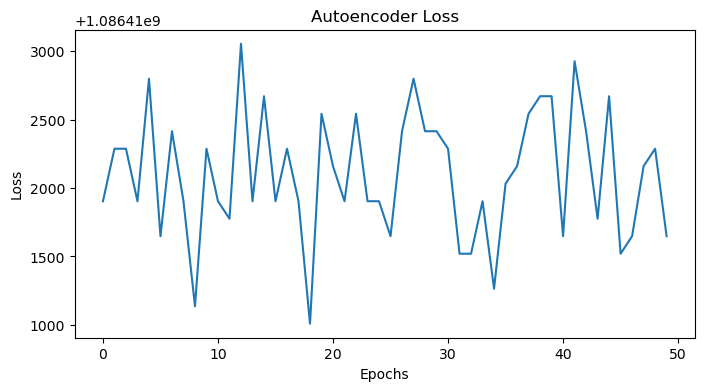

In [30]:
# Reconstruct the input data using the trained autoencoder
reconstructed_data = autoencoder.predict(val_data)

# Calculate the reconstruction loss
mse = np.mean(np.power(val_data - reconstructed_data, 2), axis=1)

# Print the mean and standard deviation of the reconstruction loss
print("Mean Squared Error (MSE):", np.mean(mse))
print("Standard Deviation (SD) of MSE:", np.std(mse))

# Plot the loss and accuracy graph
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'])
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [28]:
history

In [31]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and validation data
normalized_train_data = scaler.fit_transform(train_data)
normalized_val_data = scaler.transform(val_data)

# Now you can use normalized_train_data and normalized_val_data for training and validation


In [35]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_dim = normalized_train_data.shape[1]  # Number of features in your data
encoding_dim = 32  # Number of nodes in the bottleneck layer

# Define the input layer
input_layer = Input(shape=(input_dim,))

# Define the encoding layers
encoder_layer1 = Dense(128, activation='relu')(input_layer)
encoder_layer2 = Dense(64, activation='relu')(encoder_layer1)
encoder_layer3 = Dense(encoding_dim, activation='relu')(encoder_layer2)

# Define the decoding layers with symmetric structure
decoder_layer1 = Dense(64, activation='relu')(encoder_layer3)
decoder_layer2 = Dense(128, activation='relu')(decoder_layer1)
decoder_layer3 = Dense(input_dim, activation='sigmoid')(decoder_layer2)

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder_layer3)

# Compile the model
autoencoder.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

# Train the model with validation data
autoencoder.fit(normalized_train_data, normalized_train_data, epochs=100, batch_size=32, shuffle=True, validation_data=(normalized_val_data, normalized_val_data))


Epoch 1/100
763/763 [==============================] - 1s 1ms/step - loss: 0.9031 - val_loss: 0.8438
Epoch 2/100
763/763 [==============================] - 1s 1ms/step - loss: 0.8575 - val_loss: 0.8276
Epoch 3/100
763/763 [==============================] - 1s 1ms/step - loss: 0.8463 - val_loss: 0.8263
Epoch 4/100
763/763 [==============================] - 1s 1ms/step - loss: 0.8404 - val_loss: 0.8176
Epoch 5/100
763/763 [==============================] - 1s 1ms/step - loss: 0.8345 - val_loss: 0.8041
Epoch 6/100
763/763 [==============================] - 1s 1ms/step - loss: 0.8188 - val_loss: 0.7993
Epoch 7/100
763/763 [==============================] - 1s 1ms/step - loss: 0.8110 - val_loss: 0.7785
Epoch 8/100
763/763 [==============================] - 1s 1ms/step - loss: 0.7816 - val_loss: 0.7530
Epoch 9/100
763/763 [==============================] - 1s 1ms/step - loss: 0.7717 - val_loss: 0.7531
Epoch 10/100
763/763 [==============================] - 1s 1ms/step - loss: 0.7714 - val_lo

763/763 [==============================] - 1s 1ms/step - loss: 0.7287 - val_loss: 0.7100
Epoch 82/100
763/763 [==============================] - 1s 1ms/step - loss: 0.7289 - val_loss: 0.7097
Epoch 83/100
763/763 [==============================] - 1s 1ms/step - loss: 0.7288 - val_loss: 0.7096
Epoch 84/100
763/763 [==============================] - 1s 1ms/step - loss: 0.7270 - val_loss: 0.7024
Epoch 85/100
763/763 [==============================] - 1s 1ms/step - loss: 0.7193 - val_loss: 0.6992
Epoch 86/100
763/763 [==============================] - 1s 1ms/step - loss: 0.7194 - val_loss: 0.7011
Epoch 87/100
763/763 [==============================] - 1s 1ms/step - loss: 0.7192 - val_loss: 0.7000
Epoch 88/100
763/763 [==============================] - 1s 1ms/step - loss: 0.7185 - val_loss: 0.6988
Epoch 89/100
763/763 [==============================] - 1s 1ms/step - loss: 0.7178 - val_loss: 0.6994
Epoch 90/100
763/763 [==============================] - 1s 1ms/step - loss: 0.7180 - val_loss: 

Epoch 1/1000
763/763 [==============================] - 2s 1ms/step - loss: 0.8512 - val_loss: 0.7865
Epoch 2/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.8045 - val_loss: 0.7845
Epoch 3/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.7986 - val_loss: 0.7752
Epoch 4/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.7922 - val_loss: 0.7647
Epoch 5/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.7829 - val_loss: 0.7631
Epoch 6/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.7814 - val_loss: 0.7625
Epoch 7/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.7811 - val_loss: 0.7631
Epoch 8/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.7809 - val_loss: 0.7607
Epoch 9/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.7740 - val_loss: 0.7547
Epoch 10/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.772

763/763 [==============================] - 1s 1ms/step - loss: 0.6962 - val_loss: 0.6796
Epoch 81/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6969 - val_loss: 0.6789
Epoch 82/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6962 - val_loss: 0.6815
Epoch 83/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6962 - val_loss: 0.6793
Epoch 84/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6967 - val_loss: 0.6789
Epoch 85/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6967 - val_loss: 0.6787
Epoch 86/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6963 - val_loss: 0.6786
Epoch 87/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6960 - val_loss: 0.6801
Epoch 88/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6963 - val_loss: 0.6796
Epoch 89/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6964 - v

763/763 [==============================] - 1s 1ms/step - loss: 0.6960 - val_loss: 0.6784
Epoch 160/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6960 - val_loss: 0.6788
Epoch 161/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6961 - val_loss: 0.6790
Epoch 162/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6957 - val_loss: 0.6784
Epoch 163/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6957 - val_loss: 0.6782
Epoch 164/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6956 - val_loss: 0.6786
Epoch 165/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6958 - val_loss: 0.6781
Epoch 166/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6953 - val_loss: 0.6780
Epoch 167/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6970 - val_loss: 0.6789
Epoch 168/1000
763/763 [==============================] - 1s 1ms/step - loss: 0

Epoch 238/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6954 - val_loss: 0.6784
Epoch 239/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6969 - val_loss: 0.6784
Epoch 240/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6957 - val_loss: 0.6784
Epoch 241/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6956 - val_loss: 0.6797
Epoch 242/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6959 - val_loss: 0.6788
Epoch 243/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6958 - val_loss: 0.6787
Epoch 244/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6956 - val_loss: 0.6785
Epoch 245/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6964 - val_loss: 0.6789
Epoch 246/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6957 - val_loss: 0.6783
Epoch 247/1000
763/763 [==============================] - 1s 1ms

Epoch 317/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6959 - val_loss: 0.6781
Epoch 318/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6958 - val_loss: 0.6782
Epoch 319/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6953 - val_loss: 0.6779
Epoch 320/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6955 - val_loss: 0.6780
Epoch 321/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6955 - val_loss: 0.6786
Epoch 322/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6958 - val_loss: 0.6789
Epoch 323/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6956 - val_loss: 0.6781
Epoch 324/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6959 - val_loss: 0.6783
Epoch 325/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6957 - val_loss: 0.6791
Epoch 326/1000
763/763 [==============================] - 1s 1ms

Epoch 396/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6959 - val_loss: 0.6784
Epoch 397/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6957 - val_loss: 0.6784
Epoch 398/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6955 - val_loss: 0.6791
Epoch 399/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6955 - val_loss: 0.6785
Epoch 400/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6961 - val_loss: 0.6782
Epoch 401/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6955 - val_loss: 0.6782
Epoch 402/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6962 - val_loss: 0.6784
Epoch 403/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6963 - val_loss: 0.6790
Epoch 404/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6961 - val_loss: 0.6784
Epoch 405/1000
763/763 [==============================] - 1s 1ms

Epoch 475/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6960 - val_loss: 0.6784
Epoch 476/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6959 - val_loss: 0.6793
Epoch 477/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6957 - val_loss: 0.6784
Epoch 478/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6959 - val_loss: 0.6788
Epoch 479/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6961 - val_loss: 0.6790
Epoch 480/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6954 - val_loss: 0.6782
Epoch 481/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6959 - val_loss: 0.6784
Epoch 482/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6962 - val_loss: 0.6784
Epoch 483/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6961 - val_loss: 0.6793
Epoch 484/1000
763/763 [==============================] - 1s 1ms

Epoch 554/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6970 - val_loss: 0.6799
Epoch 555/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6963 - val_loss: 0.6790
Epoch 556/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6963 - val_loss: 0.6791
Epoch 557/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6965 - val_loss: 0.6789
Epoch 558/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6961 - val_loss: 0.6799
Epoch 559/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6965 - val_loss: 0.6786
Epoch 560/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6958 - val_loss: 0.6784
Epoch 561/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6963 - val_loss: 0.6790
Epoch 562/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6966 - val_loss: 0.6797
Epoch 563/1000
763/763 [==============================] - 1s 1ms

Epoch 633/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6956 - val_loss: 0.6784
Epoch 634/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6956 - val_loss: 0.6786
Epoch 635/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6962 - val_loss: 0.6786
Epoch 636/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6963 - val_loss: 0.6785
Epoch 637/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6956 - val_loss: 0.6806
Epoch 638/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6954 - val_loss: 0.6785
Epoch 639/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6972 - val_loss: 0.6788
Epoch 640/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6963 - val_loss: 0.6790
Epoch 641/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6960 - val_loss: 0.6789
Epoch 642/1000
763/763 [==============================] - 1s 1ms

Epoch 712/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6958 - val_loss: 0.6782
Epoch 713/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6958 - val_loss: 0.6783
Epoch 714/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6963 - val_loss: 0.6791
Epoch 715/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6965 - val_loss: 0.6807
Epoch 716/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6970 - val_loss: 0.6787
Epoch 717/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6962 - val_loss: 0.6784
Epoch 718/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6967 - val_loss: 0.6803
Epoch 719/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6967 - val_loss: 0.6787
Epoch 720/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6961 - val_loss: 0.6785
Epoch 721/1000
763/763 [==============================] - 1s 1ms

Epoch 791/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6967 - val_loss: 0.6794
Epoch 792/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6966 - val_loss: 0.6788
Epoch 793/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6964 - val_loss: 0.6791
Epoch 794/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6967 - val_loss: 0.6809
Epoch 795/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6969 - val_loss: 0.6790
Epoch 796/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6958 - val_loss: 0.6797
Epoch 797/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6964 - val_loss: 0.6784
Epoch 798/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6959 - val_loss: 0.6789
Epoch 799/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6976 - val_loss: 0.6796
Epoch 800/1000
763/763 [==============================] - 1s 1ms

Epoch 870/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6943 - val_loss: 0.6761
Epoch 871/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6930 - val_loss: 0.6755
Epoch 872/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6930 - val_loss: 0.6754
Epoch 873/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6930 - val_loss: 0.6765
Epoch 874/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6933 - val_loss: 0.6758
Epoch 875/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6928 - val_loss: 0.6758
Epoch 876/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6930 - val_loss: 0.6761
Epoch 877/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6939 - val_loss: 0.6757
Epoch 878/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6940 - val_loss: 0.6762
Epoch 879/1000
763/763 [==============================] - 1s 1ms

Epoch 949/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6938 - val_loss: 0.6804
Epoch 950/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6941 - val_loss: 0.6756
Epoch 951/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6933 - val_loss: 0.6779
Epoch 952/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6941 - val_loss: 0.6806
Epoch 953/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6934 - val_loss: 0.6758
Epoch 954/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6938 - val_loss: 0.6756
Epoch 955/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6929 - val_loss: 0.6758
Epoch 956/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6927 - val_loss: 0.6766
Epoch 957/1000
763/763 [==============================] - 1s 1ms/step - loss: 0.6933 - val_loss: 0.6754
Epoch 958/1000
763/763 [==============================] - 1s 1ms

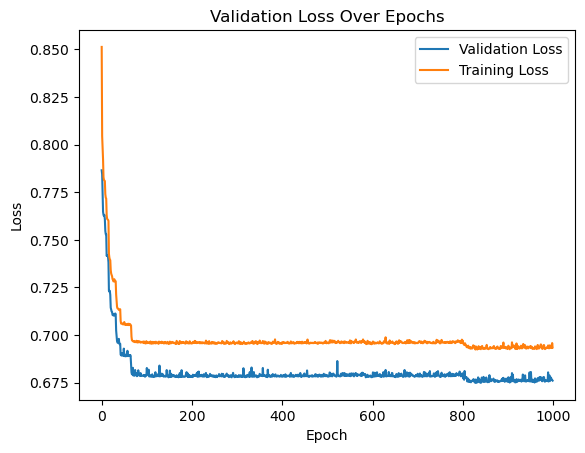

In [44]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_dim = normalized_train_data.shape[1]  # Number of features in your data
encoding_dim = 32  # Number of nodes in the bottleneck layer

# Define the input layer
input_layer = Input(shape=(input_dim,))

# Define the encoding layers
encoder_layer1 = Dense(128, activation='relu')(input_layer)
encoder_layer2 = Dense(64, activation='relu')(encoder_layer1)
encoder_layer3 = Dense(encoding_dim, activation='relu')(encoder_layer2)

# Define the decoding layers with symmetric structure
decoder_layer1 = Dense(64, activation='relu')(encoder_layer3)
decoder_layer2 = Dense(128, activation='relu')(decoder_layer1)
decoder_layer3 = Dense(input_dim, activation='sigmoid')(decoder_layer2)

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder_layer3)

# Compile the model
autoencoder.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

# Train the model with validation data and save training history
history = autoencoder.fit(normalized_train_data, normalized_train_data, epochs=1000, batch_size=32, shuffle=True, validation_data=(normalized_val_data, normalized_val_data))

# Plot the validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Over Epochs')
plt.legend()
plt.show()


In [45]:
encoder = Model(inputs=input_layer, outputs=encoder_layer3)
decoder_input = Input(shape=(encoding_dim,))
decoder_layer1_decoded = autoencoder.layers[-3](decoder_input)
decoder_layer2_decoded = autoencoder.layers[-2](decoder_layer1_decoded)
decoder_layer3_decoded = autoencoder.layers[-1](decoder_layer2_decoded)
decoder = Model(inputs=decoder_input, outputs=decoder_layer3_decoded)


In [46]:
encoder

In [47]:
decoder

In [48]:
autoencoder.save('my_autoencoder_model.keras')
encoder.save('my_encoder_model.keras')
decoder.save('my_decoder_model.keras')